<a href="https://colab.research.google.com/github/hrbae/DL_from_scratch_my/blob/main/DLFS_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Colab\ Notebooks/DL_from_scratch_my

/content/drive/MyDrive/Colab Notebooks/DL_from_scratch_my


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *

In [4]:
def f(x,y):
  return x**2/20.0 + y**2

def df(x,y):
  return x/10.0, 2.0*y

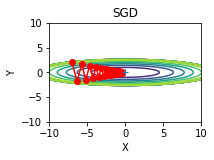

In [9]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads={}
grads['x'], grads['y']=0,0

optimizer = SGD(lr=0.95)
idx=1
x_history=[]
y_history=[]

for i in range(30):
  x_history.append(params['x'])
  y_history.append(params['y'])

  grads['x'], grads['y'] = df(params['x'], params['y'])
  optimizer.update(params, grads)

x=np.arange(-10, 10, 0.01)
y=np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x,y)
Z = f(X,Y)

#외곽선 단순화
mask = Z > 7
Z[mask]=0

#그래프 그리기
plt.subplot(2, 2, idx)
idx+=1
plt.plot(x_history, y_history, 'o-', color="red")
plt.contour(X, Y, Z)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.plot(0, 0, '+')
#colorbar()
#spring()
plt.title("SGD")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()